In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Load your dataset
df = pd.read_csv('../Data/raw_analyst_ratings.csv')


In [12]:
# 1. Headline length analysis

df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


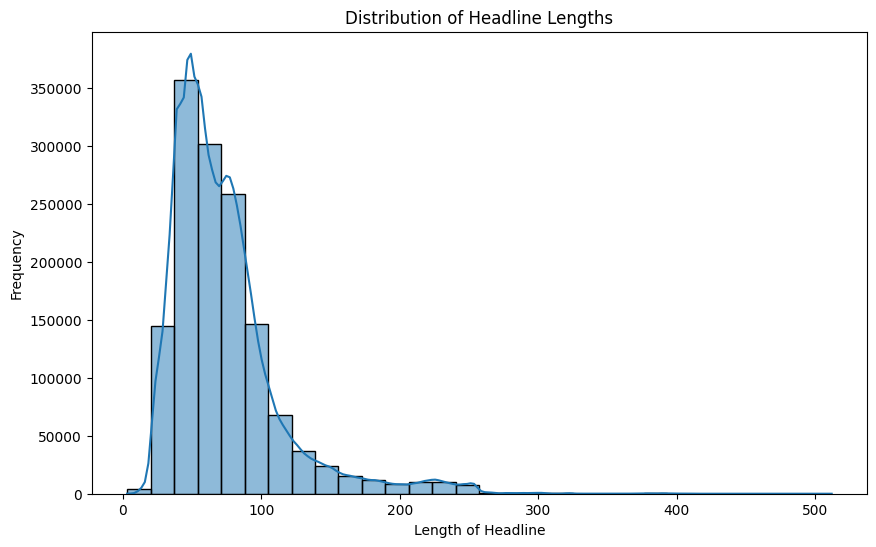

In [14]:
# Histogram of headline lengths

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')
plt.show()

In [16]:
# 2. Article count by publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head())


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


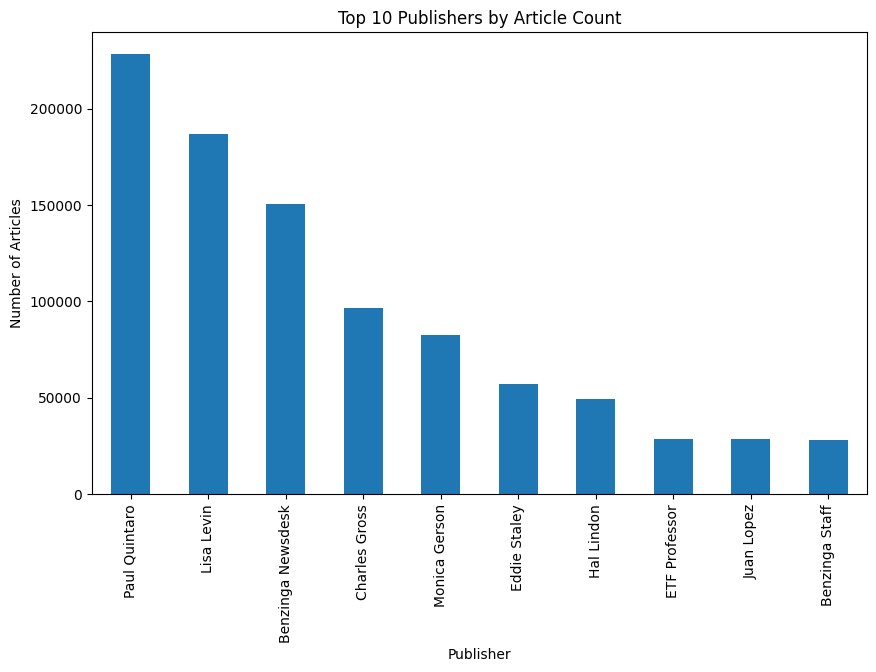

In [18]:
# Bar chart of top publishers

plt.figure(figsize=(10, 6))
publisher_counts.head(10).plot(kind='bar')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

In [25]:
# 4. Stock symbol frequency analysis

stock_symbol_counts = df['stock'].value_counts()
print(stock_symbol_counts.head())

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
Name: count, dtype: int64


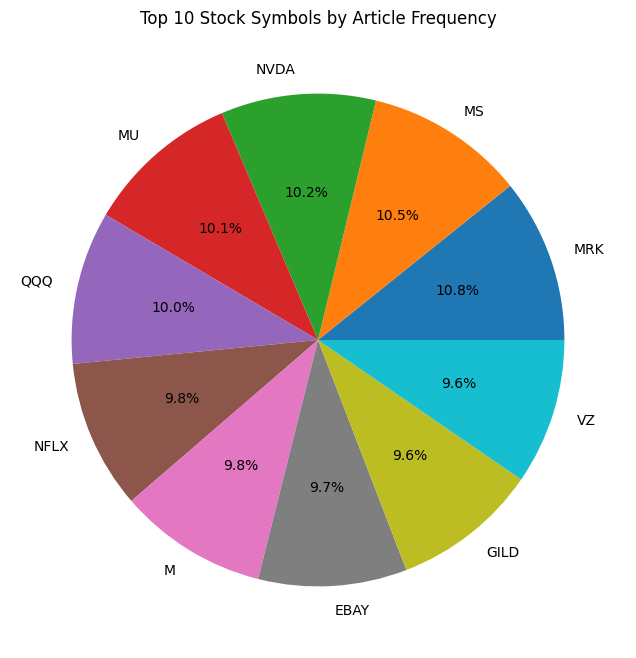

In [26]:
plt.figure(figsize=(8, 8))
stock_symbol_counts.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Stock Symbols by Article Frequency')
plt.ylabel('')
plt.show()